In [53]:
from pyhive import presto
from pandas import DataFrame
import numpy as np
import pandas as pd

# Connection to presto

In [58]:
presto_conn = presto.connect(
    host='165.232.118.33',
    port=8090,
    catalog='mongodb',
    schema='tbdmproject'
)
presto_cur = presto_conn.cursor()

# Dataframe creation

In [73]:
presto_cur.execute("select * from general INNER JOIN measures on general.uuid=measures.uuid")
records=presto_cur.fetchall()
df = DataFrame(records)
df.columns = ['ref', 'cuid', 't','tz','cat','sn','type','uuid','t','d','u','tz','v','k','uuid']
df = df.T.groupby(level=0).first().T
df

,cat,cuid,d,k,ref,sn,t,type,tz,u,uuid,v
0,0620,d0e99fc3-d47a-45ec-90e1-27942e5a4bf3,None,adc_channel_01,jzp://edv#0501.0000,141,1685369982980,luxmeter,2023-05-29T14:19:42.980Z,,53000219-37ee-48ca-a8d7-cd16a84339ce,0.0
1,0620,d0e99fc3-d47a-45ec-90e1-27942e5a4bf3,None,pressure,jzp://edv#0501.0000,141,1685369982980,luxmeter,2023-05-29T14:19:42.980Z,Pa,53000219-37ee-48ca-a8d7-cd16a84339ce,56707.7
2,0620,d0e99fc3-d47a-45ec-90e1-27942e5a4bf3,jzp://coo#ffffffff00000500.0000,coordinator,jzp://edv#0501.0000,141,1685369982980,luxmeter,2023-05-29T14:19:42.980Z,,53000219-37ee-48ca-a8d7-cd16a84339ce,1.0
3,0620,d0e99fc3-d47a-45ec-90e1-27942e5a4bf3,None,illuminance,jzp://edv#0501.0000,141,1685369982980,luxmeter,2023-05-29T14:19:42.980Z,lx,53000219-37ee-48ca-a8d7-cd16a84339ce,311.39
4,0620,d0e99fc3-d47a-45ec-90e1-27942e5a4bf3,None,adc_channel_00,jzp://edv#0501.0000,141,1685369982980,luxmeter,2023-05-29T14:19:42.980Z,,53000219-37ee-48ca-a8d7-cd16a84339ce,361.36
...,...,...,...,...,...,...,...,...,...,...,...,...
2412,0600,e71b6ba6-cc16-4f88-aa24-8767d88b59bd,None,orientation,jzp://edv#0504.0000,176,1685373831896,environmental,2023-05-29T15:23:51.896Z,,edd306ea-c8e2-44cf-b037-749913cf5c0a,0.0
2413,0600,e71b6ba6-cc16-4f88-aa24-8767d88b59bd,None,relative_humidity,jzp://edv#0504.0000,176,1685373831896,environmental,2023-05-29T15:23:51.896Z,%,edd306ea-c8e2-44cf-b037-749913cf5c0a,75.6
2414,0600,e71b6ba6-cc16-4f88-aa24-8767d88b59bd,None,dew_point,jzp://edv#0504.0000,176,1685373831896,environmental,2023-05-29T15:23:51.896Z,℃,edd306ea-c8e2-44cf-b037-749913cf5c0a,10.3
2415,0600,e71b6ba6-cc16-4f88-aa24-8767d88b59bd,None,battery_level,jzp://edv#0504.0000,176,1685373831896,environmental,2023-05-29T15:23:51.896Z,V,edd306ea-c8e2-44cf-b037-749913cf5c0a,3.54


# Graphs :

# Temperatures recorded in Time in Presence devices

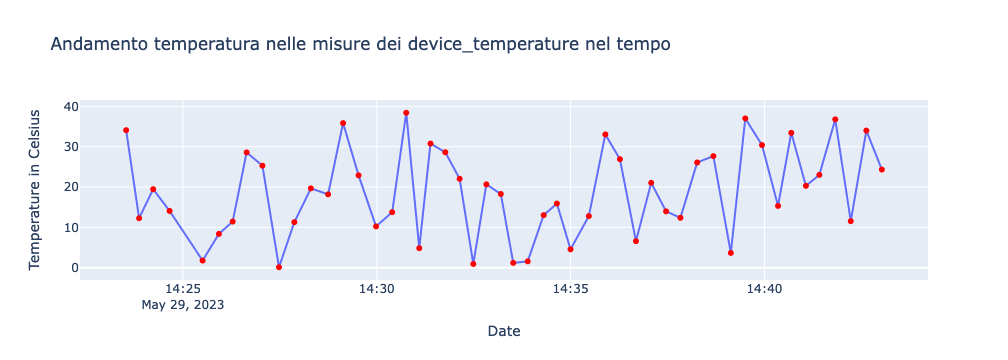

In [66]:
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
df1=df.loc[df['type']=='presence']
df1=df1.loc[df1['k']=='device_temperature']
df1['tz'] = pd.to_datetime(df1['tz'])
fig = px.line(df1, x="tz", y="v")
fig2 = px.scatter(df1, x="tz", y="v", color_discrete_sequence=['red'])
fig3 = go.Figure(data=fig.data + fig2.data)
fig3.update_layout(xaxis_title="Date", 
                   yaxis_title="Temperature in Celsius",
                   title='Andamento temperatura nelle misure dei device_temperature nel tempo'
                  )
fig3.show()

# Battery Level recorded over Time in Luxmeter type devices

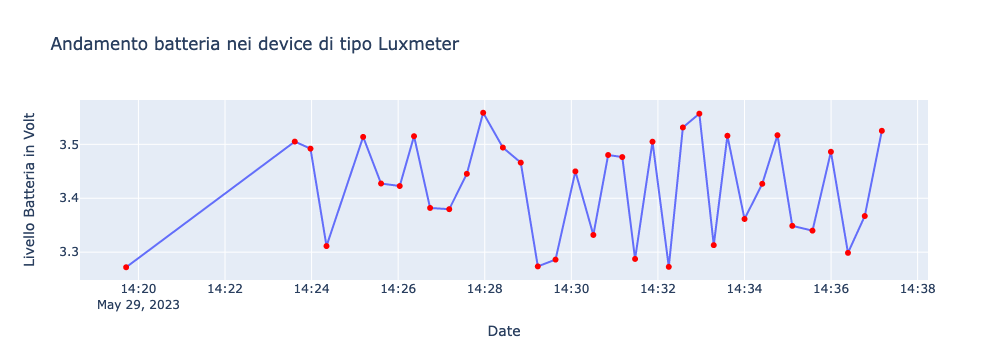

In [44]:
df1=df.loc[df['type']=='luxmeter']
df1=df1.loc[df1['k']=='battery_level']
df1['tz'] = pd.to_datetime(df1['tz'])
fig = px.line(df1, x="tz", y="v")
fig2 = px.scatter(df1, x="tz", y="v", color_discrete_sequence=['red'])
fig3 = go.Figure(data=fig.data + fig2.data)
fig3.update_layout(xaxis_title="Date", 
                   yaxis_title="Livello Batteria in Volt",
                   title='Andamento batteria nei device di tipo Luxmeter'
                  )
fig3.show()

# PPM recorded over Time in Gasmeter type devices

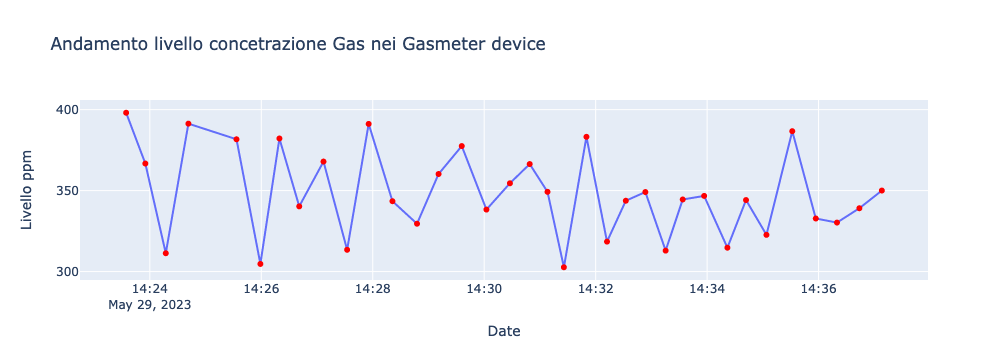

In [45]:
df1=df.loc[df['type']=='gasmeter']
df1=df1.loc[df1['k']=='ppm']
df1['tz'] = pd.to_datetime(df1['tz'])
fig = px.line(df1, x="tz", y="v")
fig2 = px.scatter(df1, x="tz", y="v", color_discrete_sequence=['red'])
fig3 = go.Figure(data=fig.data + fig2.data)
fig3.update_layout(xaxis_title="Date", 
                   yaxis_title="Livello ppm",
                   title='Andamento livello concetrazione Gas nei Gasmeter device'
                  )
fig3.show()

# Relative_humidity graph recorded over Time in Environmental type devices

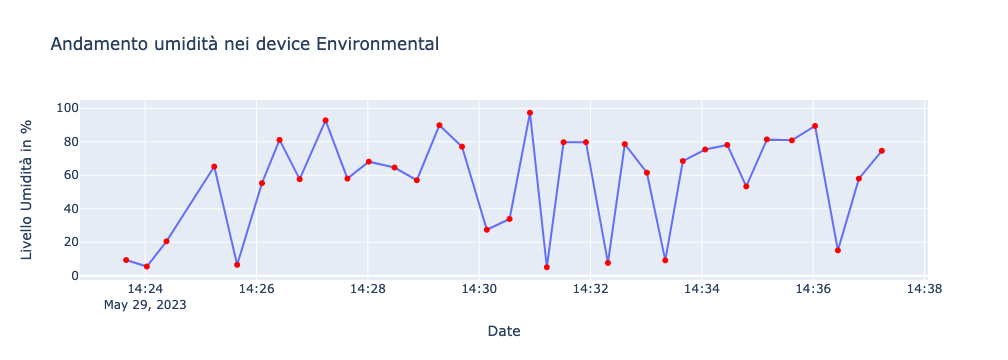

In [46]:
df1=df.loc[df['type']=='environmental']
df1=df1.loc[df1['k']=='relative_humidity']
df1['tz'] = pd.to_datetime(df1['tz'])
fig = px.line(df1, x="tz", y="v")
fig2 = px.scatter(df1, x="tz", y="v", color_discrete_sequence=['red'])
fig3 = go.Figure(data=fig.data + fig2.data)
fig3.update_layout(xaxis_title="Date", 
                   yaxis_title="Livello Umidità in %",
                   title='Andamento umidità nei device Environmental'
                  )
fig3.show()

# Histogram of average temperatures between devices

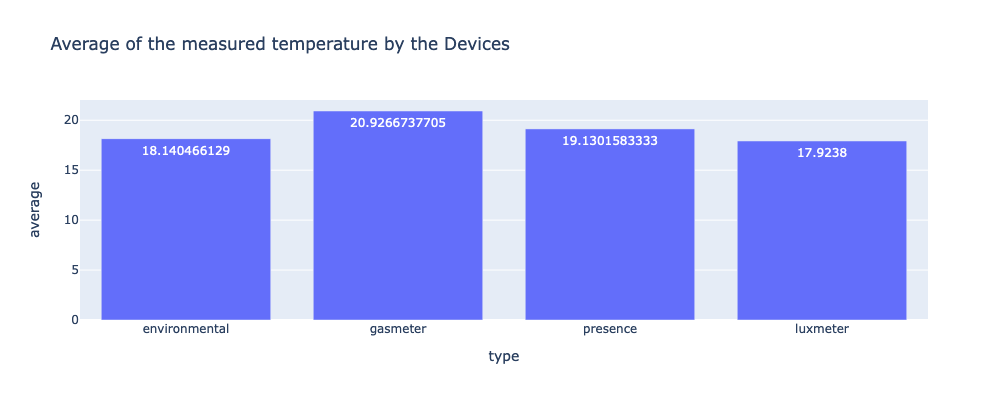

In [74]:
envavg={'average': df.loc[(df['type']=='environmental') & (df['k']=='device_temperature')]['v'].mean(),'type': 'environmental'}
gasavg={'average': df.loc[(df['type']=='gasmeter') & (df['k']=='device_temperature')]['v'].mean(),'type': 'gasmeter'}
prsavg={'average': df.loc[(df['type']=='presence') & (df['k']=='device_temperature')]['v'].mean(),'type': 'presence'}
luxavg={'average': df.loc[(df['type']=='luxmeter') & (df['k']=='device_temperature')]['v'].mean(),'type': 'luxmeter'}
df3 = pd.DataFrame.from_records([envavg,gasavg,prsavg,luxavg])
df3
fig = px.bar(df3, x="type", y="average", title="Average of the measured temperature by the Devices",height=400,text_auto='',)
fig.show()

# Pie chart with percentages of data from the corresponding device

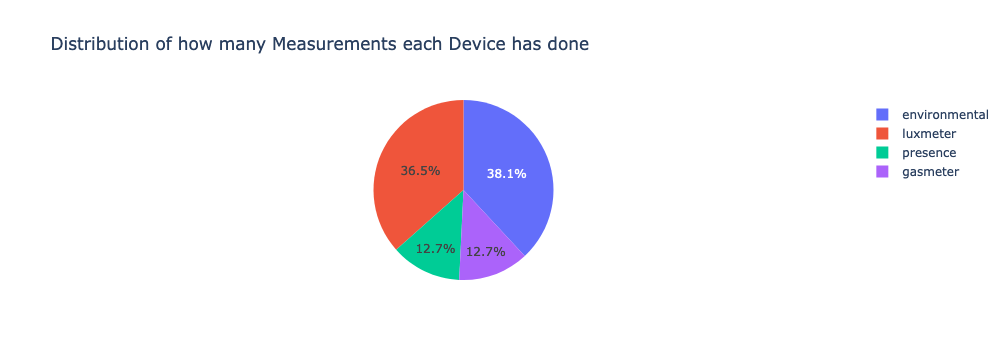

In [48]:
series = df['type'].value_counts()
df4 = pd.DataFrame(series)
df4 = df4.reset_index()  
df4.columns = ['Type', 'Measurements']
fig = px.pie(df4, values='Measurements', names='Type', title='Distribution of how many Measurements each Device has done')
fig.show()

# Replicas of the graphs made with SQL queries

# Temperatures recorded in Time in Presence devices

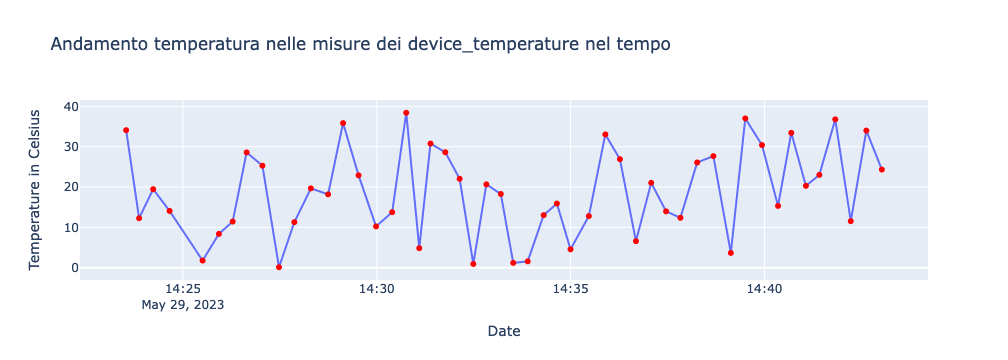

In [67]:
presto_cur.execute("select measures.tz,measures.v from general INNER JOIN measures on general.uuid=measures.uuid WHERE general.type='presence' AND measures.k='device_temperature'")
records=presto_cur.fetchall()
df2 = DataFrame(records)
df2.columns = ['tz', 'v']
df2 = df2.T.groupby(level=0).first().T
df2['tz'] = pd.to_datetime(df1['tz'])
fig = px.line(df1, x="tz", y="v")
fig2 = px.scatter(df1, x="tz", y="v", color_discrete_sequence=['red'])
fig3 = go.Figure(data=fig.data + fig2.data)
fig3.update_layout(xaxis_title="Date", 
                   yaxis_title="Temperature in Celsius",
                   title='Andamento temperatura nelle misure dei device_temperature nel tempo'
                  )
fig3.show()

# Histogram of average temperatures between devices

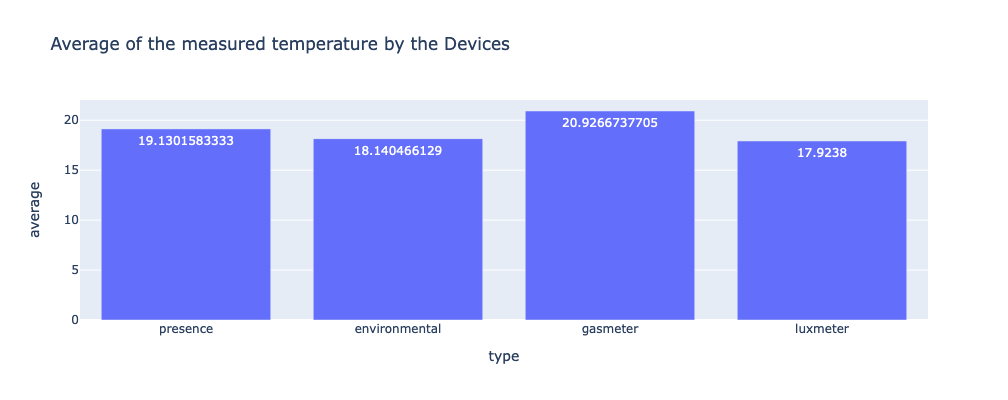

In [75]:
presto_cur.execute("select avg(measures.v),general.type FROM general INNER JOIN measures on general.uuid=measures.uuid WHERE measures.k='device_temperature' GROUP BY general.type")
records=presto_cur.fetchall()
df2 = DataFrame(records)
df2.columns = ['average', 'type']
fig = px.bar(df2, x="type", y="average", title="Average of the measured temperature by the Devices",height=400,text_auto='',)
fig.show()

# Pie chart with percentages of data from the corresponding device

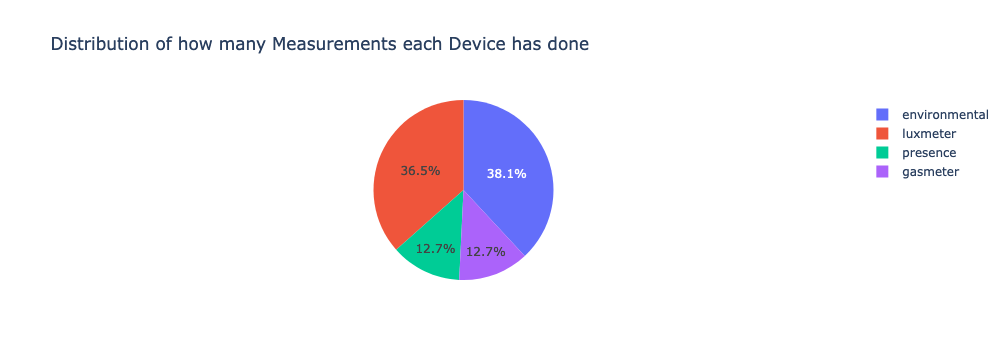

In [77]:
presto_cur.execute("select count(*),general.type FROM general INNER JOIN measures on general.uuid=measures.uuid GROUP BY general.type")
records=presto_cur.fetchall()
df2 = DataFrame(records)
df2.columns = ['Measurements', 'Type']
fig = px.pie(df4, values='Measurements', names='Type', title='Distribution of how many Measurements each Device has done')
fig.show()